# A brief tutorial introducing python and Jupyter Notebook

This webpage is an example of a Jupyter Notebook. The basic concept is that of a "notebook" containing text and programming code. You can easily edit the notebook, and run the programs and see the output of the programs within the notebook. This is a powerful paradigm that is well suited to physics research, particularly when collaborating with other people.

"Cells" in a Jupyter Notebook are rectangular areas on the page that contain either text (such as this cell) or python code (such as the trivial examples in the following few cells).

Text cells can be edited by double-clicking within the cell. Code cells can be edited by single clicking within the cell.

Pressing CTRL-ENTER within a text cell will display the text. Pressing CTRL-ENTER within a code cell with execute the python code, and display any output below.


In [2]:
1 + 1

2

In [3]:
a = 1/7
print(a)

0.14285714285714285


0.14285714285714285

In [3]:
import math

print(math.sin(30))
print(math.sin(30 * math.pi / 180))

-0.9880316240928618
0.49999999999999994


# Using "Markdown" to enter text and equations

Text cells, such as this one, contain normal text such as the words in this sentence, with a few non-alphabetic characters used for special formating such as headings, italics, dot points, and mathematics. 

The special formatting is called "Markdown".

Double-click somewhere in this cell to see the Markdown source for the cell. You can then press CTRL-ENTER to process the Markdown into displayed text.

Here are some examples of Markdown:

# To create a big heading, begin the line with a single hash

## More hashes produce 

### smaller

#### and smaller headings

* a dot point starts with an asterisk
* here is another dot point
* **bold text is delimited by double asterisks** like `**this**`
* *Italic text uses single asterisks*
* **_bold italic_ is delimited by underscores within double asterisks** like `**_this_**`

Here is some in-line LaTeX for mathematics: $\pi\approx3.14159$

```
If you want a block of text to appear verbatim with a monospaced
font, enclose the text with lines containing triple opening single quotes.
Note that Markdown processing is suspended in verbatim mode,
so you can type $\pi$ and **bold** and have them displayed without interpretation
```

Block quotes can be useful, as Richard Feynman said:

> For a successful technology, reality must take precedence over public relations,
> for Nature cannot be fooled.

Hyperlinks are easy, e.g, here is [my homepage](http://www.phys.unsw.edu.au/~mcba).

An enumerated list:
1. Uno
2. Dos
3. Tres
  1. Indent by two spaces
  2. for this effect
    1. And another two spaces
    2. for another level of indentation
    
Here is the black body function as a equation on a separate line: $$b_\nu={2h\nu^3\over{c^2}}{1\over{\exp\bigl({h\nu\over{kT}}\bigr)-1}}$$

Images can be easily inserted too:

![my image](http://www.phys.unsw.edu.au/~mcba/sfdsc06640.jpg)

In [4]:
import math

# Fundamental constants.

planck = 6.626e-34
boltzmann = 1.381e-23
c = 2.998e8

# Input variables.

wavelength = 2.35e-6
t = 273.15 - 40

# Derived variables.

nu = c / wavelength

# The black-body formula.

bb = (2 * planck * nu**3)/(c**2 * (math.exp((planck * nu)/(boltzmann * t)) - 1.0))

print("bb = ", bb, " W m-2 sr-2 Hz-1")

# Convert to "astronomer's units" using Jansky = 1E-26 W m-2 Hz-1, and the
# steradian is 4.254E10 square arcseconds.

bb *= 1.0E6 / (4.254E10 * 1.0e-26)
print("bb = ", bb, " uJy per sq arcsecond")


bb =  1.2139154530564587e-19  W m-2 sr-2 Hz-1
bb =  285.3585926319837  uJy per sq arcsecond


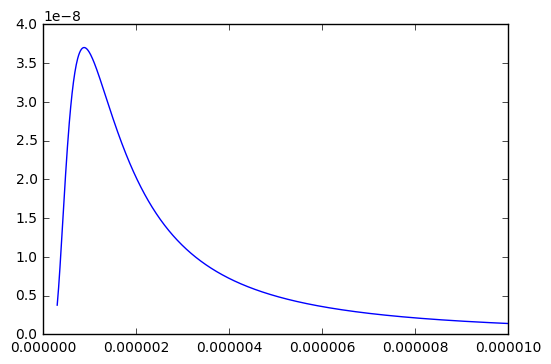

In [6]:
import numpy as np
import matplotlib.pyplot as plt

t = 5800.0
wavelength = np.arange(0.3e-6, 10e-6, 0.01e-6)

nu = c / wavelength

bb = (2 * planck * nu**3)/(c**2 * (np.exp((planck * nu)/(boltzmann * t)) - 1.0))

plt.plot(wavelength, bb)
plt.show()

Some of the power of python comes from its rich set of data types, as shown in the cell below.

In [7]:
a = 1.234 # numbers
b = 1.2 + 3.4j # complex numbers
c = 'SCIF is an acronym' # strings; immutable
d = [1, 2, 3, ['arbitrary content', 1.2 + 3.4j]] # lists of things; mutable ordered collections of arbitrary objects
e = (1, 'red', 1.2 + 3.4j, {}) # tuples; immutable ordered collections of arbitrary objects
f = {'red' : 1, 'green' : 2} # dictionaries; mutable mappings (no concept of order)
g = {'a', 'b', 2, (1, 2)} # sets; mutable unordered collections of unique and immutable objects

print(a, b * 2, c.upper(), d[3], e[3:-1:-1], f['green'], g, 'b' in g)

1.234 (2.4+6.8j) SCIF IS AN ACRONYM ['arbitrary content', (1.2+3.4j)] () 2 {(1, 2), 2, 'b', 'a'} True


Note the concepts of "mutable" (i.e., object that can be changed), and "immutable" (object that can not be changed). Some data types are ordered (e.g, lists, tuples), but for other data types an order doesn't make sense (dictionaries, sets). The ordered data types can be accessed by an index (counting from zero; or negative if measured from the end of the collection), which can be a simple number or a "slice".

10


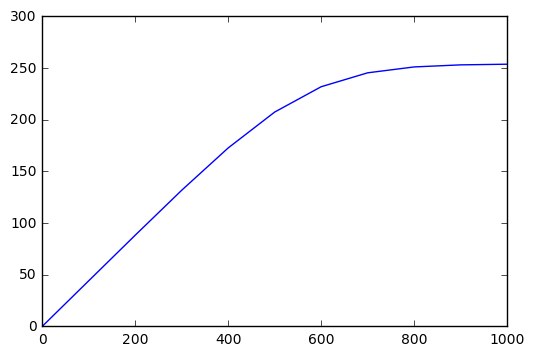

In [3]:
import matplotlib.pyplot as plt

nSteps = int(input(""))

timeStep = 100           # years
waterDepth = 4000        # meters
L = 1350                 # Watts/m2
heatCapacity = 1.6884E10 # J/K m2
albedo = 0.3
epsilon = 1
sigma = 5.67E-8          # W/m2 K4

time = [0]
T = [0]
heatContent = T[0] * heatCapacity

for i in range(0, nSteps):
    heatContent += (L * (1 - albedo) / 4 - epsilon * sigma * pow(T[-1], 4)) * timeStep * 365.25 * 24 * 3600
    T.append(heatContent / heatCapacity)
    time.append(time[-1] + timeStep)
    heatOut = sigma * pow(T[-1], 4)

#print(T[-1], heatOut)
plt.plot(time, T)
plt.show()